<h1>Mandatory Assignment 1</h1>
Data Analysis and Preprocessing for a Small Real Estate Project

<h2>Task 1</h2>
Data Analysis and Preprocessing for a Small Real Estate Project

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 1.1 Load the Boston Housing dataset
df = pd.read_csv("c:/temp/HousingData.csv")

# 1.2 Display the first few rows of the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
# 1.3 Show basic information about the dataset (number of samples, variables and their types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<h5>Analysis:</h5>
The dataset represents a two-dimensional array or dataframe consisting of two different datatypes: floats (eg. CRIM and ZN) and integers (eg. RAD and TAX)

It has a shape of 14 columns and 506 rows. 8 out of the 14 columns have 0 null values whereas the rest all have 20.

In [3]:
# 1.4 Provide the following Descriptive Statistics: the mean and standard deviation for all columns. 

# 1.4.1 Mean
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [4]:
# 1.4.2 Standard Deviation
df.std()

CRIM         8.720192
ZN          23.388876
INDUS        6.835896
CHAS         0.255340
NOX          0.115878
RM           0.702617
AGE         27.999513
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.155871
MEDV         9.197104
dtype: float64

<h5>Analysis:</h5>
In the context of real estate, the most interesting value to me is "MEDV" (The median value of owner occupied homes), as it allows for comparison across different areas and time ranges to predict house prices. 

Another interesting statistc is "CRIM" (Per capita crime rate) as both the average and standard deviation are low, indicating that crime rate in general is very low and there is litte variation across the different towns(eg. very few outliers).

<h2>Task 2:</h2>
Data Visualisation and Exploration

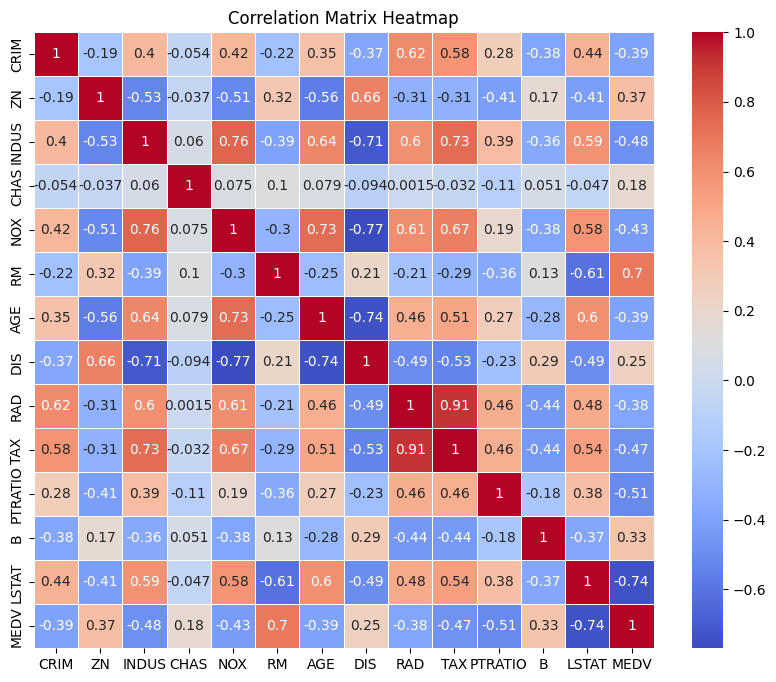

In [5]:
# 2.1 Create a correlation matrix heatmap and provide an analysis of your observations.

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h5>Analysis:</h5>
The above code generate a correlation matrix heatmap showing both the positive and negative correlations between all the columns. Positive correlation is shown by the warmer colours (reds) and negative correlation by the cooler colours (blue). Each correlation is also annoted with a correlation coefficient representing degrees of positive and negative correlation with a numerical value. Higher values (closer to 1) indicates positive correlation and lowers ones (below 0) indicate negative correlations.

<h3>2.2 Identify the top 3 variables most correlated with the median house value (MEDV). Explain why these variables might be important predictors of the house price?</h3>

* RM (Average number of rooms)
* LSTAT (Percentage of lower status population)
* PTRATIO (Pupil-Teacher ratio by town)

RM is heavily positively correlated with MEDV. This makes sense as the average number of rooms is usually a good indication of the size of a house. The larger the house is, the more rooms it will have and subsequently the value of the house will be higher.

LSTAT is negatively correlated with MEDV. As the percentage of lower class population increases the value of the houses decreases. This can be for a few different reasons, but the lower class population generally has a lower purchasing power compared higher status population and there will therefore be less demand for houses and prices fall.

PTRATIO is negatively correlated with MEDV. PTRATIO can be a decent indicator to the status of a population. Lower status populations tend to have more students per teacher (e.g: private vs public schools) PTRATIO's positive correlation with LSTAT is some evidence of this.

<h3>2.3 Plot histograms for all numerical features. Are they skewed or not?</h3>

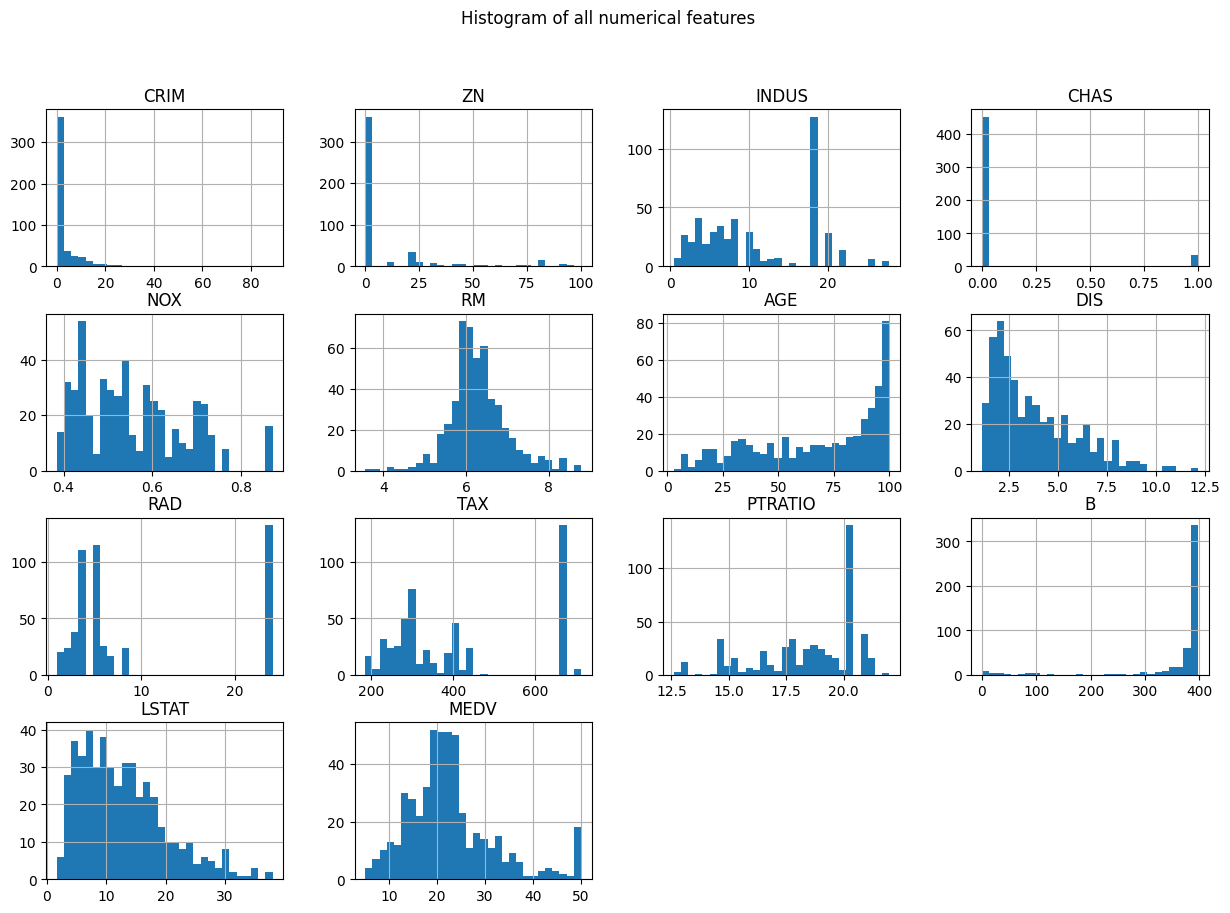

In [6]:
# Plot histogram for all numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram of all numerical features")
plt.show()

<h2>Task 3:</h2>
Data Preprocessing

<h3>3.1 Check for missing values. How many are there?</h3>

In [9]:
# Find and display the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<h5>Analysis:</h5>
There are 6 columns with missing values. Interestingly they're all missing the same amount (20).
As these are all numerical values we can fill them with each columns respective mean values.

<h3>3.2 Replace the missing values with the mean for numerical (int, float) variables and the mode for categorical (string, boolean) variables.</h3>

In [8]:
# Replace missing numerical values with the mean of the respective column
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df["ZN"] = df["ZN"].fillna(df["ZN"].mean())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())
df["CHAS"] = df["CHAS"].fillna(df["CHAS"].mean())
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())

<h5>Analysis:</h5>
Here I am using the .mean() method to calculate the mean values of each column before using the .fillna() method to replace each na or null value with it. This ensures that all values in the dataset are filled without (for the most part) skewing the results.

<h2>Task 4:</h2>
Extract the MEDV variable from the DataFrame by moving it into a separate ndarray. 

<h3>4.1 Split your DataFrame into x (DataFrame with all variables except for MEDV) and y (ndarray that contains only MEDV).</h3>

In [13]:
# Extract the MEDV column and store it in a variable called y.
y = df["MEDV"].values

# Drop the MEDV column from the dataset and store it in a variable called x.
x = df.drop(columns=["MEDV"])

<h5>Analysis:</h5>
The above code extracts the MEDV column from the original dataframe and saves it as a one-dimensional NumPy ndarray in variable y, as well using the drop() method to drop(remove) the MEDV column from a copy of the dataframe and storing that in variable x.

<h3>4.2 Use the reshape method to transform y (ndarray) into a two-dimensional array with many rows and one column (y should not be a simple one-dimensional ndarray).</h3>

In [16]:
# Reshape y to a two-dimensional array
y = y.reshape(-1, 1)

(506, 1)

<h5>Analysis:</h5>
We're using the .reshape() method to change the shape (amount of rows and columns) of the array.
Using -1 as the amount of rows will automatically determine the amount of rows based on the total number of elements and the specified number of columns.

<h3>4.3 Print the shapes of X and y to confirm the splitting is done correctly.</h3>

In [17]:
# Print the shape of x and y
print(f"The shape of x is: {x.shape}\nThe shape of y is: {y.shape}")

The shape of x is: (506, 13)
The shape of y is: (506, 1)


<h5>Analysis:</h5>
We can now see that the new shape of x is 506 rows and 13 columns, one less than the original dataframe. That means the MEDV columns was succesfully removed.

Y on the hand has a shape of 506 rows, but only 1 columns confirming that the split was done correctly.

<h3>4.4 What do you think is the purpose of extracting the MEDV variable from the DataFrame into a separate ndarray?</h3>